In [1]:
import time                                                 # para tiempo
inicio=time.time()                                          # momento inicial

import pandas as pd                                         # dataframe
import numpy as np                                          # numerical python, algebra lineal
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt                             # plots, graficos
import seaborn as sns                                       # plots

import warnings                                             # avisos
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [2]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.linear_model import Lasso

In [4]:
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.naive_bayes import ComplementNB as CNB

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor as RFR

**Funciones**


In [6]:
def trash_d(df):
    df_col = df.columns
    trash = []
    for i in df_col:
        if 'url' in i:

            trash.append(i)
        elif 'id' in i:

            trash.append(i)
        elif 'name' in i:

            trash.append(i)
        elif 'scrape' in i:

            trash.append(i)
        elif 'license' in i: #is it relevant??

            trash.append(i)
        elif 'latitude' in i:

            trash.append(i)
        elif 'longitude' in i:

            trash.append(i)

    print(trash)
    return df.drop(trash,axis=1,inplace=True)

In [7]:
def delete_nan(df):
    data_1 = df.loc[:, df.isnull().mean() >= .5]
    print(data_1.columns)
    return df.drop(data_1,axis=1,inplace=True)

In [8]:
def bin_corr_col(x):
                                        
    corr_matrix = x.corr().abs()# Create correlation matrix
                                        
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Select upper triangle of correlation matrix
    
    to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]# Find features with correlation greater than 0.90
    print(to_drop)

    return x.drop(to_drop, axis=1, inplace=True) # Drop features

In [9]:
def fill_nan(df):
    
    for i in df.columns:
        
        df.fillna(0, inplace=True)
     #round(df[i].mean(),3)

    print(df.isna().sum().sample(5))
    print('Sample of 5 random columns')

In [10]:
import re

patron='[0-9]+'

def limpieza_ba(x):
    n_ba=0
    
    try:
        n_ba=int(re.findall(patron, x)[0])
    except:
        n_ba=0
        
    return n_ba

In [11]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)

    y_pred=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('\n')

In [12]:
def review_scores(df):
    df_NAN_1 = df.copy()
    df_NAN_2=df_NAN_1[['review_scores_rating','review_scores_checkin','review_scores_location']]
    df_NAN_3 = df_NAN_2.apply(fill_nan)
    df.assign(RER=df_NAN_3.review_scores_rating.values,
              RSC=df_NAN_3.review_scores_checkin.values,
              RSL=df_NAN_3.review_scores_location.values)
    
    

## 1. Train CSV & Test CSV treatment:


**1.1. Import data:**

**Train CSV**

In [13]:
df_train = pd.read_csv('data/train.csv')

**Test CSV**

In [14]:
df_ts=pd.read_csv('data/test.csv')

**1.2. Get numeric data:**

**Train**

In [15]:
df_TN = df_train._get_numeric_data()

**Test**

In [16]:
df_test= df_ts._get_numeric_data()

**1.3. Delete non useful columns:**

**Train**

In [17]:
trash_d(df_TN)

['id', 'scrape_id', 'host_id', 'latitude', 'longitude']


**Test**

In [18]:
trash_d(df_test)

['id', 'scrape_id', 'host_id', 'latitude', 'longitude']


**1.4. Delete columns with 90% of correlation:**

**Train**

In [19]:
bin_corr_col(df_TN)

['host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90']


**Test**

In [20]:
bin_corr_col(df_test)
print(df_test.shape)

['host_total_listings_count', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90']
(1389, 28)


**1.5. Fill 'Nan' values with 0 in all columns:**

**Train**

In [21]:
fill_nan(df_TN)

price                                           0
calculated_host_listings_count_private_rooms    0
review_scores_checkin                           0
maximum_maximum_nights                          0
bedrooms                                        0
dtype: int64
Sample of 5 random columns


**Test**

In [22]:
fill_nan(df_test)
print(df_test.shape)

number_of_reviews_ltm     0
reviews_per_month         0
host_listings_count       0
review_scores_location    0
availability_365          0
dtype: int64
Sample of 5 random columns
(1389, 28)


**1.6.** Deletting **Bathrooms** column and adding **Bathrooms_text** column clean (Test_1):

**Train**

In [23]:

df_TN.drop('bathrooms',axis=1,inplace=True)
df_TN['bathrooms']= df_train.bathrooms_text.apply(limpieza_ba)

In [24]:
df_TN.head()

,host_listings_count,neighbourhood_group_cleansed,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_maximum_nights,maximum_maximum_nights,calendar_updated,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms
0,13,0.0,3,1.0,0.0,87.0,2,1125,1125.0,1125.0,0.0,0,249,81,0,0,4.62,4.56,4.29,4.57,4.75,4.69,4.49,10,0,10,0,0.91,1
1,0,0.0,4,2.0,2.0,250.0,2,1125,1125.0,1125.0,0.0,3,3,9,4,1,5.00,5.00,5.00,4.89,5.00,5.00,4.89,1,1,0,0,0.40,1
2,20,0.0,2,1.0,1.0,151.0,1,1125,99.0,99.0,0.0,25,267,47,3,1,4.79,4.83,4.91,4.62,4.87,4.87,4.40,20,4,0,0,1.25,1
3,1,0.0,2,1.0,1.0,139.0,2,30,1125.0,1125.0,0.0,0,0,10,3,0,5.00,5.00,4.80,5.00,5.00,4.90,4.70,1,1,0,0,0.31,1
4,1,0.0,2,1.0,2.0,95.0,2,7,7.0,7.0,0.0,18,349,166,1,0,4.67,4.76,4.81,4.95,4.89,4.49,4.57,1,0,1,0,1.78,1


**Test**

In [25]:
df_test.drop('bathrooms',axis=1,inplace=True)
df_test['bathrooms']= df_ts.bathrooms_text.apply(limpieza_ba)

In [26]:
df_test.bathrooms.unique()

array([1, 2, 3, 0, 4])

**1.7 Delete, Columns under 0.2 MDI score columns:**

**Train**

In [27]:
cols_under =['maximum_nights','calendar_updated','number_of_reviews_l30d']

In [28]:
df_TN.drop(cols_under,axis=1,inplace=True)

**Test**

In [29]:
df_test.drop(cols_under,axis=1,inplace=True)

**1.8 Delete, Columns with high corr observed in the heatplot:**

In [30]:
cols_corr_high = ['number_of_reviews_ltm','review_scores_rating','review_scores_accuracy','review_scores_checkin','review_scores_communication']

**Train**

In [31]:
df_TN.drop(cols_corr_high,axis=1,inplace=True)

**Test**

In [32]:
df_test.drop(cols_corr_high,axis=1,inplace=True)

**1.9 Delete, Columns with high corr observed in the heatplot:**

- 'review_scores_location',
- 'review_scores_vaz


try delete one and then the other one. 

In [33]:
rsv = ['review_scores_value']

**Train**

In [34]:
df_TN.drop(rsv,axis=1,inplace=True)

**Test**

In [35]:
df_test.drop(rsv,axis=1,inplace=True)

**1.10 Delete, Columns:**

In [36]:
tests_4 = ['bedrooms','beds','minimum_maximum_nights','calculated_host_listings_count_shared_rooms']

**Train**

In [37]:
df_TN.drop(tests_4,axis=1,inplace=True)

**Test**

In [38]:
df_test.drop(tests_4,axis=1,inplace=True)

**1.11 Delete, Columns:**

In [39]:
rsc=['calculated_host_listings_count_entire_homes','review_scores_cleanliness','calculated_host_listings_count_entire_homes']

**Train**

In [40]:
df_TN.drop(rsc,axis=1,inplace=True)

**Test**

In [41]:
df_test.drop(rsc,axis=1,inplace=True)

**Columns index to interprete Feaure importance:**

DANAGER!!! Loop-create function:

In [42]:
cols = {}
for num,c in enumerate(df_TN.columns):
    cols[num]=c

### 2. Feature importances with a forest of trees & Correlation heatplot

**2.1 Feature importances with a forest of trees**

In [43]:
X, y = make_classification(
    n_samples=100,
    n_features=df_TN.shape[1],
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

In [44]:
feature_names = [f"Column {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

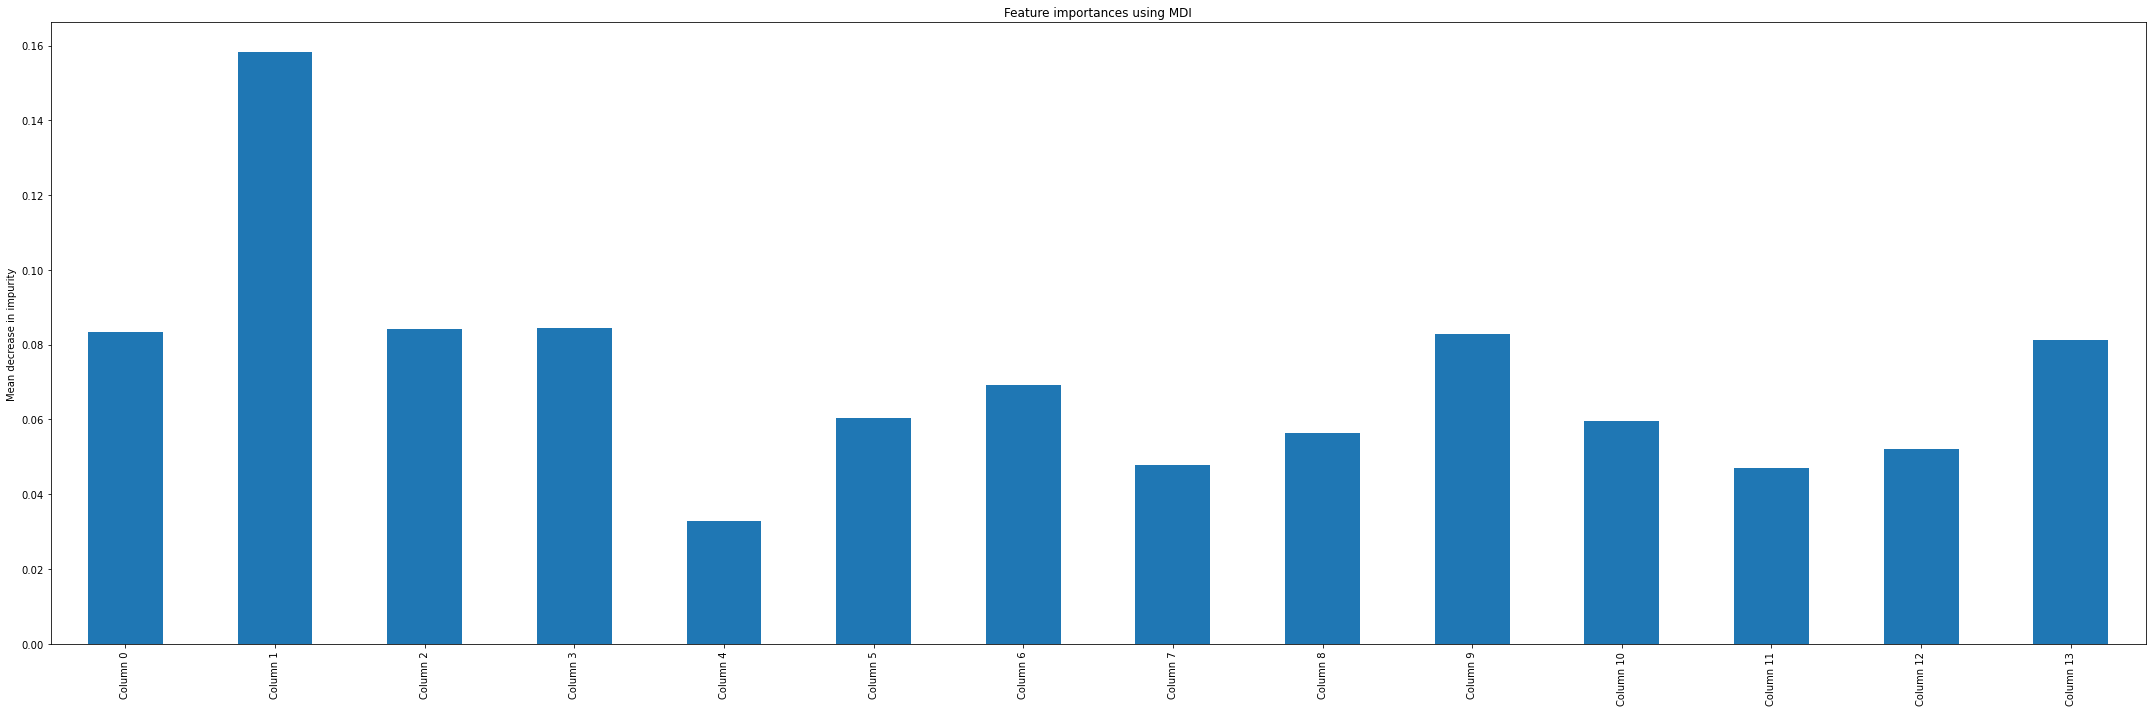

In [46]:

#forest_importances = pd.Series(importances, index=df_TN.columns)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(30,10))
MDI_PLOT_1 = forest_importances.plot.bar( ax=ax) #(yerr=std,) I took out the std config in the plot in order to see better the result.
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#MDI_PLOT_1.figure.savefig("data/MDI_PLOT_1.jpg", dpi=1000)

**Consutl the column name by its index number:**


In [47]:
cols

{0: 'host_listings_count',
 1: 'neighbourhood_group_cleansed',
 2: 'accommodates',
 3: 'price',
 4: 'minimum_nights',
 5: 'maximum_maximum_nights',
 6: 'availability_30',
 7: 'availability_365',
 8: 'number_of_reviews',
 9: 'review_scores_location',
 10: 'calculated_host_listings_count',
 11: 'calculated_host_listings_count_private_rooms',
 12: 'reviews_per_month',
 13: 'bathrooms'}

In [48]:
X, y = make_classification(
    n_samples=100,
    n_features=df_test.shape[1],
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False)

X_train_rft, X_test_rft, y_train_rft, y_test_rft = tts(df_TN.drop('price',axis=1), 
                                               df_TN.price)

In [49]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_rft, y_train_rft)

RandomForestClassifier(random_state=42)

In [50]:
y_pred_rft=forest.predict(df_test)

train_score=forest.score(X_train_rft, y_train_rft)  
test_score=forest.score(X_test_rft, y_test_rft)
    
print(forest)
print('Train:', train_score)
print('Test:', test_score)
#print('MSE_R2: ',mse(y_pred_rft, y_test_rft, squared=True))
print('\n')

RandomForestClassifier(random_state=42)
Train: 0.99648
Test: 0.052783109404990404




**2.2 Correlation heatplot**

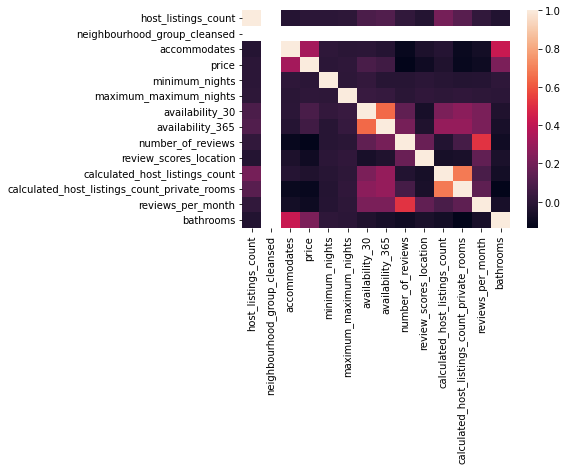

In [51]:
sns.heatmap(df_TN.corr());

### 3. OBSERVACIONES:

**Transformation_1:**

**Observation:**

- Eliminamos la columns de **Bathrooms** (que son todo ceros)
- Añadimos las columna de **Bathrooms_text**, convertida a numerica.

**Results:**

We have a stabilization of the score, the underfitting has decreasse consistinly although the R2, is high.

**Conclussion:**

I will proceed with the submission of the RFR model prediction.

The best results are from RFR:

    *RFR()
    Train: 0.7717785953846144
    Test: 0.8090641560993984
    MSE_R2:  121.5271733616819

The worst results are from Lasso:

    *Lasso()
    Train: 0.1333113015962274
    Test: 0.4136928621559328
    MSE_R2:  89.36023805741623



**Transformation_2:**

**Observation:**

In the results from the Feature importances done with Forest of Trees, it shows that certain columns have higher less importance than the rest with a Mean Decrease in Impurity (MDI), under 0.1 


This are the shown columns:

- Col 7 : 'maximum_nights'
- Col 10 : 'calendar_updated'
- Col 15 : 'number_of_reviews_l30d'



**Results**

Best:

    *LinearRegression()
    Train: 0.1368723442128157
    Test: 0.3874453239688559
    MSE_R2: 99.34319298832972
    
Worst:

    *RandomForestRegressor(random_state=42)
    Train: 0.9082784320000593
    Test: 0.1862306235915736
    MSE_R2:  206.75052345561477
 
**Results:**

We have a stabilization of the score, the even though ther itill a consisnten over fitting the R2 is under 100

**Conclussion:**

Will keep the three columns out of the model for now.




**Transformation_3:**

**Observation:**

In the results from the Feature importances done with Forest of Trees, it shows that certain columns have higher less importance than the rest with a Mean Decrease in Impurity (MDI), under 0.1 


This are the shown columns:

- 'number_of_reviews_ltm',
- 'review_scores_rating',
- 'review_scores_accuracy',
- 'review_scores_checkin',
- 'review_scores_communication'

**Except:** This tow columns that migh be relevant:

- 'review_scores_location',
- 'review_scores_value',

**Results:**

- The MDI has not change much, we have now a MDI minium of 0.4
- The Correlation between columns has decrease as it was expected but the tow remaining columns from the same field still correlated. 

Best: R2 en Kaggle: 100.88... (BASURA)

    *RandomForestRegressor(random_state=42)
    Train: 0.890809916016523
    Test: 0.7834136713380204
    MSE_R2:  105.4705018255655

Worst:

    *LinearRegression()
    Train: 0.1506597305348294
    Test: -0.02890642433688506
    MSE_R2: 100.31076782284862
 
**Conclussion:**

- Will continue, observing the results.
- A evaluation of the two remaining columns will be carried out and tested with out one of them and later the other one. 

**Transformation_4:**

**Observation:**

Evalute the value of these tow columns and test results, fist with out one and later with out the other one.

This are the shown columns:

- 'review_scores_location',
- 'review_scores_value',


**Results:**


Best:

    

Worst:


**Conclussion:**



### 4. Definicion de Modelo con Train: 

- De aqui sacamos la variabl modelo, para hacer la prediccion con el TEST!!

### 4.1. LinReg

In [52]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = tts(df_TN.drop('price',axis=1), 
                                               df_TN.price)

In [53]:
modelo_LR=LinReg()

modelo_LR.fit(X_train_lr, y_train_lr)

LinearRegression()

In [54]:
### 1.3.1 R2

In [55]:
modelo_LR.score(X_test_lr, y_test_lr)# R2 cuanto mas cercano a 1 mejor 

0.33466731422591733

In [56]:
y_pred_LR=modelo_LR.predict(X_test_lr)
y_pred_LR.shape

(1042,)

In [57]:
train_score=modelo_LR.score(X_train_lr, y_train_lr)  
test_score=modelo_LR.score(X_test_lr, y_test_lr)
    
print(modelo_LR)
print('Train:', train_score)
print('Test:', test_score) 
print('MSE_R2:', mse(y_pred_LR, y_test_lr, squared=False))
print('\n')

LinearRegression()
Train: 0.12829039772548712
Test: 0.33466731422591733
MSE_R2: 94.60298907198128




### 4.2. Lasso

In [58]:
X_train_lss, X_test_lss, y_train_lss, y_test_lss = tts(df_TN.drop('price',axis=1), 
                                               df_TN.price)

In [59]:
modelo_LSS=Lasso()

modelo_LSS.fit(X_train_lss, y_train_lss)

Lasso()

In [60]:
### 1.3.1 R2

In [61]:
modelo_LSS.score(X_test_lss, y_test_lss)# R2 cuanto mas cercano a 1 mejor 

0.060064971568597136

In [62]:
y_pred_LSS=modelo_LSS.predict(X_test_lss)
y_pred_LSS.shape

(1042,)

In [63]:
train_score=modelo_LSS.score(X_train_lss, y_train_lss)  
test_score=modelo_LSS.score(X_test_lss, y_test_lss)
    
print(modelo_LSS)
print('Train:', train_score)
print('Test:', test_score)
print('MSE_R2: ',mse(y_pred_LSS, y_test_lss, squared=False))
print('\n')

Lasso()
Train: 0.18298119995300866
Test: 0.060064971568597136
MSE_R2:  228.97478007565815




### 4.3. RFR

In [64]:
X_train, X_test, y_train, y_test = tts(df_TN.drop('price',axis=1), 
                                               df_TN.price)

In [65]:
modelo_RFR=RFR(random_state=42)

modelo_RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [66]:
### 1.3.1 R2

In [67]:
modelo_RFR.score(X_test, y_test)# R2 cuanto mas cercano a 1 mejor 

-0.5573115151206973

In [68]:
y_pred=modelo_RFR.predict(X_test)
y_pred.shape

(1042,)

In [69]:
train_score=modelo_RFR.score(X_train, y_train)  
test_score=modelo_RFR.score(X_test, y_test)
    
print(modelo_RFR)
print('Train:', train_score)
print('Test:', test_score)
print('MSE_R2: ',mse(y_pred, y_test, squared=False))
print('\n')

RandomForestRegressor(random_state=42)
Train: 0.9024682018039338
Test: -0.5573115151206973
MSE_R2:  152.75864810059767




### 5. Various ML Models:

**In a Loop:**

- LinReg(), 
- Lasso(),
- RFR(),
- SGDC(),
- GNB(),
- MNB(),
- CNB()


In [70]:
df_TN.head()

,host_listings_count,neighbourhood_group_cleansed,accommodates,price,minimum_nights,maximum_maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_private_rooms,reviews_per_month,bathrooms
0,13,0.0,3,87.0,2,1125.0,0,249,81,4.69,10,10,0.91,1
1,0,0.0,4,250.0,2,1125.0,3,3,9,5.00,1,0,0.40,1
2,20,0.0,2,151.0,1,99.0,25,267,47,4.87,20,0,1.25,1
3,1,0.0,2,139.0,2,1125.0,0,0,10,4.90,1,0,0.31,1
4,1,0.0,2,95.0,2,7.0,18,349,166,4.49,1,1,1.78,1


In [71]:
X=df_TN.drop('price', axis=1)
y=df_TN.price

In [72]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=0.15, random_state=42)

In [73]:
modelos=[LinReg(), Lasso(),RFR(),SGDC(),GNB(),MNB(),CNB()]

for m in modelos:
    prueba_modelo(m)

LinearRegression()
Train: 0.13475684885464279
Test: 0.35548817608677064


Lasso()
Train: 0.13455202485883244
Test: 0.35168154706248755


RandomForestRegressor()
Train: 0.9089575756702972
Test: 0.2533723264186919




/opt/homebrew/Caskroom/miniconda/base/envs/ironhack_2/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier()
Train: 0.0031064670996893535
Test: 0.003194888178913738


GaussianNB()
Train: 0.04207850889579215
Test: 0.04472843450479233


MultinomialNB()
Train: 0.045467382095453264
Test: 0.003194888178913738


ComplementNB()
Train: 0.031347077096865295
Test: 0.03514376996805112




In [74]:
#y_pred_lr.shape

### 6. Guardar modelo:


Value shape 1389:

**Predicction variable by Model:**

In [75]:
y_pred=modelo_RFR.predict(df_test)

In [76]:
y_pred.shape

(1389,)

Here we place the 

In [77]:
sample_df_10=pd.DataFrame()


sample_df_10['id']=[str(i) for i in range(len(y_pred))]
sample_df_10['price']=y_pred

sample_df_10.shape

(1389, 2)

In [78]:
sample_df_10.head()

,id,price
0,0,81.680000
1,1,104.348631
2,2,105.305000
3,3,130.120000
4,4,170.870000


In [79]:
sample_df_10.to_csv('data/sample_df_10.csv',index=False)

In [80]:
y_pred.shape

(1389,)

### SUBMISSIONS:


Submition 5:

    *LinearRegression()
    Train: 0.14651660992370874
    Test: 0.3820126818795656

R2_Kaggle = 100.87018

Submition 7:

    *RandomForestRegressor()
    Train: 0.9611092937754674
    Test: 0.6794674859190988
    
R2_Kaggle = 97.74893

Submition 8: (Thisone ot LinReg)

    *RandomForestRegressor()
    Train: 0.9613236998741297
    Test: 0.6987391193036354
  
R2_Kaggle = 93.99070
